In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

(710, 675)


True

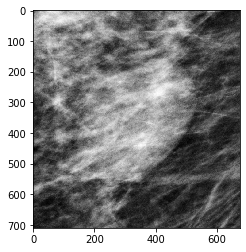

In [3]:
image = '/home/cot12/Documents/test-folder/abnormaility-cuts/client-1176-RMLO.jpg'
Beginning_imageml = cv2.imread(image,0)

q = Beginning_imageml.shape[0]
u = Beginning_imageml.shape[1]
beginning_imageml = Beginning_imageml
x1 = 2404 - 150
x2 = 2779 + 150
y1 = 2015 - 150
y2 = 2425 + 150
diffxml = x2 - x1
diffzml = y2 - y1

RMLO = np.zeros((diffzml, diffxml))
for j in range(y1, y2):
    for k in range(x1, x2):
        RMLO[j-y1,k-x1] = beginning_imageml[j,k]
        
plt.imshow(RMLO, cmap = 'gray')
print(RMLO.shape)
cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1176-RMLO-cut.jpg',RMLO)
#this just cuts out the abnomaility

(756, 767)


True

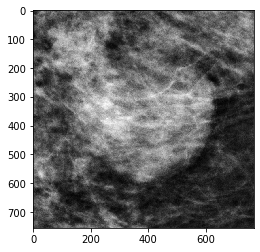

In [4]:
image = '/home/cot12/Documents/test-folder/abnormaility-cuts/client-1176-RCC.jpg'
Beginning_imagecc = cv2.imread(image,0)

q = Beginning_imagecc.shape[0]
u = Beginning_imagecc.shape[1]
beginning_imagecc = Beginning_imagecc
x1 = 2433 - 150
x2 = 2900 + 150
y1 = 1945 - 150
y2 = 2401 + 150
diffxcc = x2 - x1
diffycc = y2 - y1

RCC = np.zeros((diffycc, diffxcc))
for j in range(y1, y2):
    for k in range(x1, x2):
        RCC[j-y1,k-x1] = beginning_imagecc[j,k]
        
plt.imshow(RCC, cmap = 'gray')
print(RCC.shape)
cv2.imwrite('/home/cot12/Documents/test-folder/abnormaility-cuts/client-1176-RCC-cut.jpg',RCC)
#this just cuts out the abnomaility

In [ ]:
RMLO_density = np.zeros((diffzml, diffxml))
u = 5
for i in range(u, diffzml-u):
    for j in range(u, diffxml-u):
        
        lum = np.sum(RMLO[i-u:i+u,j-u:j+u])/(len(RMLO[i-u:i+u,j-u:j+u])**2)
        if lum >= 170:
            RMLO_density[i,j] = lum
plt.imshow(RMLO_density, cmap = 'gray')
plt.imshow(RMLO_density[:,:])
plt.colorbar()
plt.plot()

In [ ]:
cc_density = np.zeros((diffycc, diffxcc))
u = 5
for i in range(u, diffycc-u):
    for j in range(u, diffxcc-u):
        
        lum = np.sum(RCC[i-u:i+u,j-u:j+u])/(len(RCC[i-u:i+u,j-u:j+u])**2)
        if lum >= 150:
            cc_density[i,j] = lum
plt.imshow(cc_density, cmap = 'gray')
plt.imshow(cc_density[:,:])
plt.colorbar()
plt.plot()

In [ ]:
import sys
dimesional_array = np.zeros((diffxml,diffycc, diffzml))
for k in range(0, diffzml):
    for j in range(0, diffycc):
        for i in range(0, diffxml):
            if cc_density[j,i] > 0 and RMLO_density[k,i] > 0:
                dimesional_array[i,j,k] = 1

In [ ]:
x = []
y = []
z = []
for k in range(0, diffzml):
    for j in range(0, diffycc):
        for i in range(0, diffxml):
            if dimesional_array[i,j,k] == 1:
                x.append(i)
                y.append(j)
                z.append(k)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)
ax.set_xlim3d(diffxml,0)
ax.set_ylim3d(0,diffycc)
ax.set_zlim3d(0, diffzml)
ax.view_init(90,80)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)
ax.set_xlim3d(diffxml,0)
ax.set_ylim3d(0,diffycc)
ax.set_zlim3d(0, diffzml)
ax.view_init(40,80)